# Reading data from the GPS of a Smartphone

## Summary

The smartphnone app "phyphox" (avalibale for iOS and Andriod) is used to record GPS-data from the smartphone and export it into a csv-file. 

A Jupyter Notebook in Python demonstratea, how to import and  display these data.

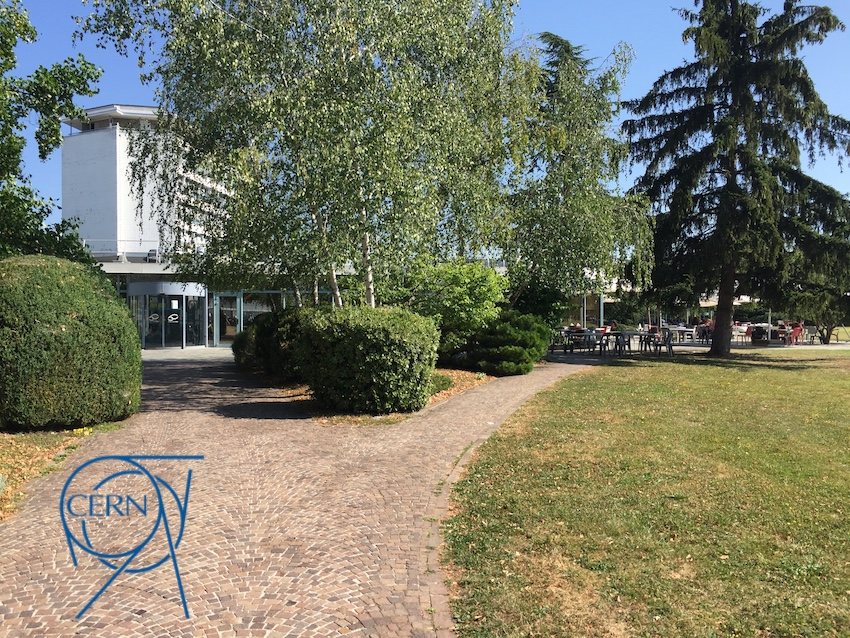

## 1. Record data with phyphox on smartphone

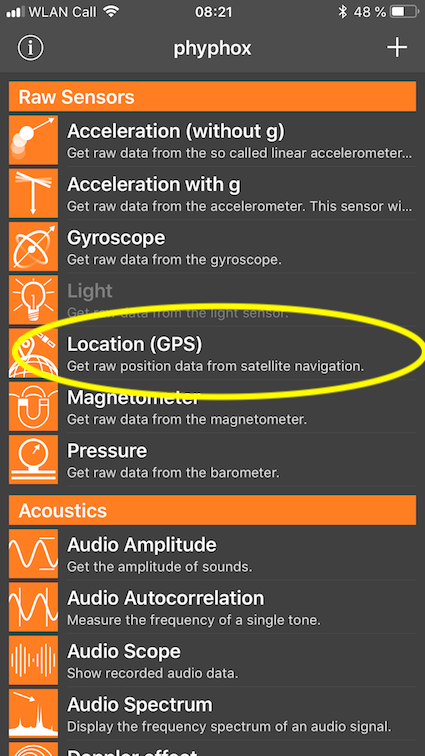
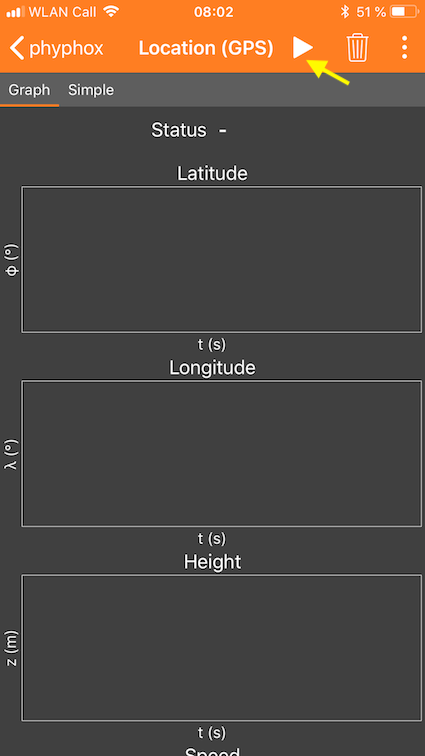
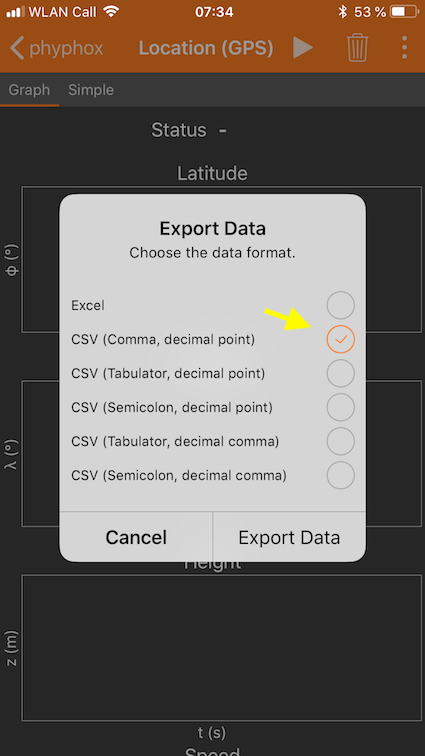

## 2. Reading the data from the csv-file

This code is needed to load some software packages that we will need to use later. Folium provides us the tools to plot the gps-track on an interactive map.

In [ ]:
import pandas as pd 
# pandas is for data structures a
import numpy as np
# numpy is for scientific computing
import matplotlib.pyplot as plt
# matplotlib is for plotting
import folium
# folium is for interactive maps

First we import the data from the csv-file and print the first 15 rows of the table to get an overview. It is  usefull to know the lentght of the imported dataset. The export option we used in phyphox was "CSV (Comma, decimal point). As you noticed the accuracy of the first 9 datapoints ist not very high.

In [ ]:
# use read_csv function from pandas to read the data into a "data frame"
gps = pd.read_csv('data/phyphox_gps.csv')
row=len(gps)
print(len(gps))
gps.head(15)

## 3. Display the data on a map

With folium we can plot our phyphox-recorded data onto an interactive OpenStreetMap. We use only very basic functions from folium. Folium is able to generate HTML, Javascript and CSS and render an interactive map on the browser. 

If you click on the map you can easily zoom and move the section.

In [ ]:
# rename the lables of the columns for better access in python
gps=gps.rename(index=str, columns={'Time (s)':'t','Latitude (°)':'lat', 'Longitude (°)': 'lon', 
                                   'Height (m)':'h', 'Speed (m/s)':'v', 'Richtung (°)' : 'dir',
                                   'Distance (km)' : 'dis', 'Horizontal Accuracy (m)' : 'h_a',
                                   'Vertical Accuracy (m)' : 'v_a', 'Satelliten' : 'sat'  })
gps.head()

In [ ]:
# use the location of CERN building 39 to plot a map with folium 
# the zoom_start is convinient for plotting our gps-track
location=[46.22984,6.053996]
map_gps = folium.Map(location,zoom_start = 17)

# set a marker on the map
folium.Marker(location).add_to(map_gps)

# now we have to cut out the data for the track
# we plot only data, if the accuracy is 5 meter or better
# px is the variable for the lattitude, py for the longitude
part = gps[gps.h_a <= 5]
px=part.lat
py=part.lon

# to plot hte track on a map we have to "zip" the px- and py-vector into a list to get "ponits"
points = list(zip(px,py))

# now we can plot the track on the map
folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(map_gps)

# show the map
map_gps

# you can save the map easily:
#map_gps.save("track.html")